#Assignment 2
##Student number:24014106

Predicting AQI value using Linear regression

In [142]:
#importing all required libraries
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [143]:
#import the dataset
df = pd.read_csv('city_day.csv', encoding = 'unicode_escape')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Taking inventory of  the data. There are 29 531 rows and 16 columns:


In [144]:
df.shape

(29531, 16)

##Dataset Overview:

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [146]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Checking to see how many null values the the column of the dataset has.

##Data Preprocessing

To ensure data integrity and facilitate error recovery during the manipulation process, a copy of the original DataFrame (denoted as df) will be created. This allows for any modifications to be performed on the duplicate, thereby preserving the original dataset (df) in its raw form. In the event of errors or unintended alterations, the raw data can be restored by reverting to the unmodified copy, ensuring the reliability and reproducibility of the analysis (McKinney, 2018).

In [147]:
#Make a copy of df so we manipulate on the copy incase of errors, we can revert to df (the raw data)
df_2 = df.copy()

#disply the first few rows of the df_2
df_2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [148]:
#Columns present in the dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [149]:
#Data Distribution
df_2.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


###Understanding the data

The dataset has to be understood in order to determine what is features are important for AQI prediction task.

One way to visualise feature importance is by creating a correlation matrix heatmap. This correlation matrix visually represents the strength and direction of linear relationships between different air pollutants and the AQI (Air Quality Index).

A high positive correlation (closer to 1) indicates that two features are highly related. A low correlation (closer to 0) indicates that there is little to no linear relationship between the features.

The matrix provides insights into the interrelationships between different air pollutants and their collective impact on AQI. This understanding is crucial for developing effective air quality management strategies.

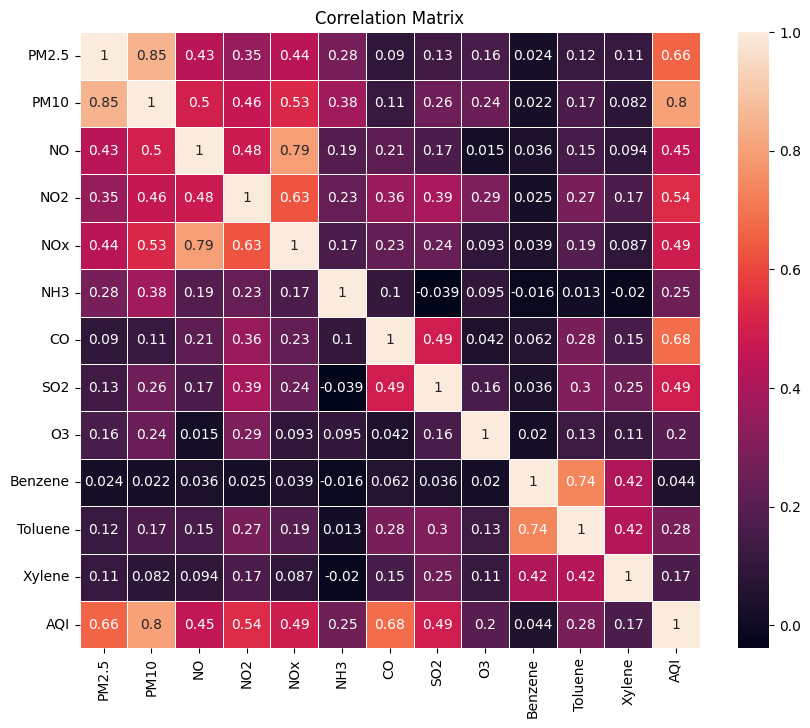

In [150]:
#Select numeric columns to be cosidered for correlation analysis
numeric_columns = df_2.select_dtypes(include=['float64', 'int64']).columns

#Calculate correlation matrix
corr_matrix = df_2[numeric_columns].corr()

#Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Overall, particulate matter (PM2.5 and PM10), along with gaseous pollutants such as CO and nitrogen oxides (NOx), emerge as primary determinants of air quality degradation, whereas the remaining pollutants exhibit varying but less pronounced effects.


###Handling the Outliers

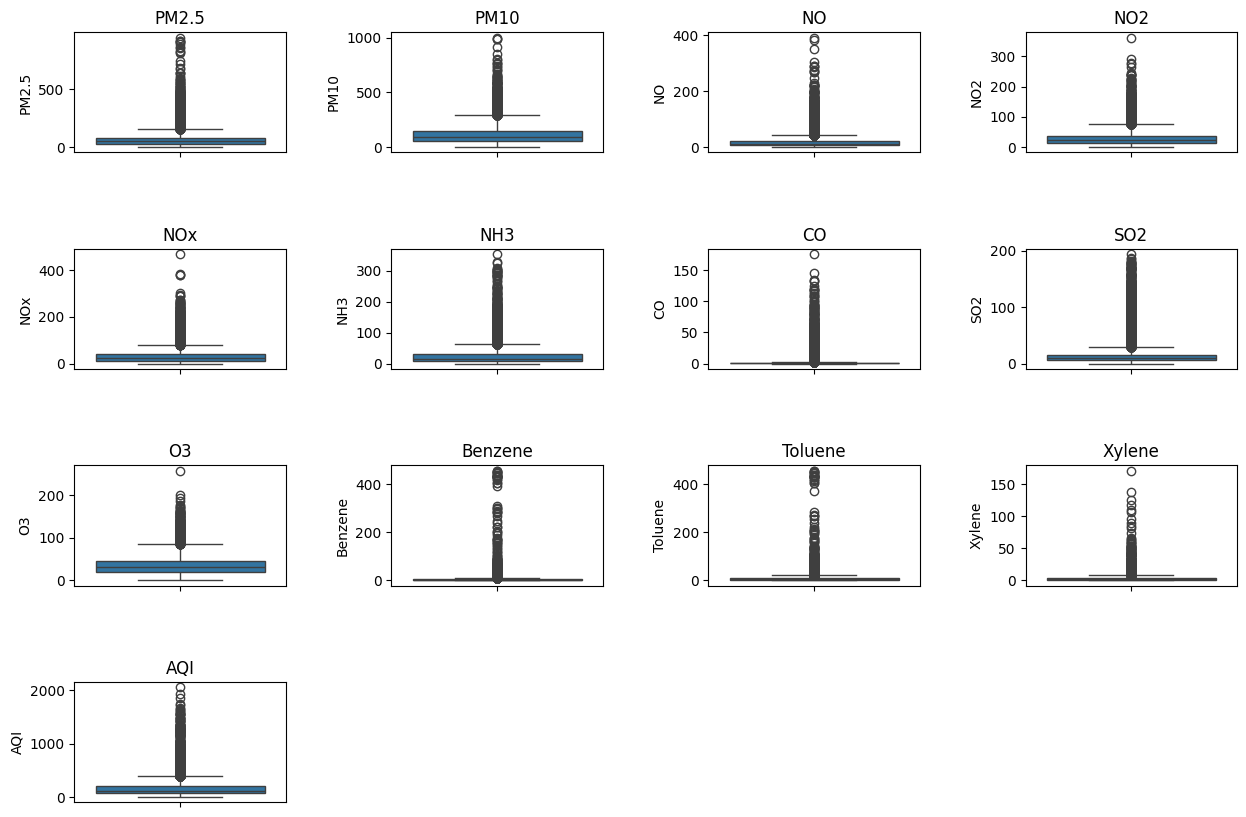

In [151]:
#Create a box plot to visualize Outliers
plt.figure(figsize=(15, 10))
for i in range(len(numeric_columns)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=numeric_columns[i], data = df_2)
    plt.title(numeric_columns[i])

#Adjust the layout to add more space between the boxplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.tight_layout
plt.show()



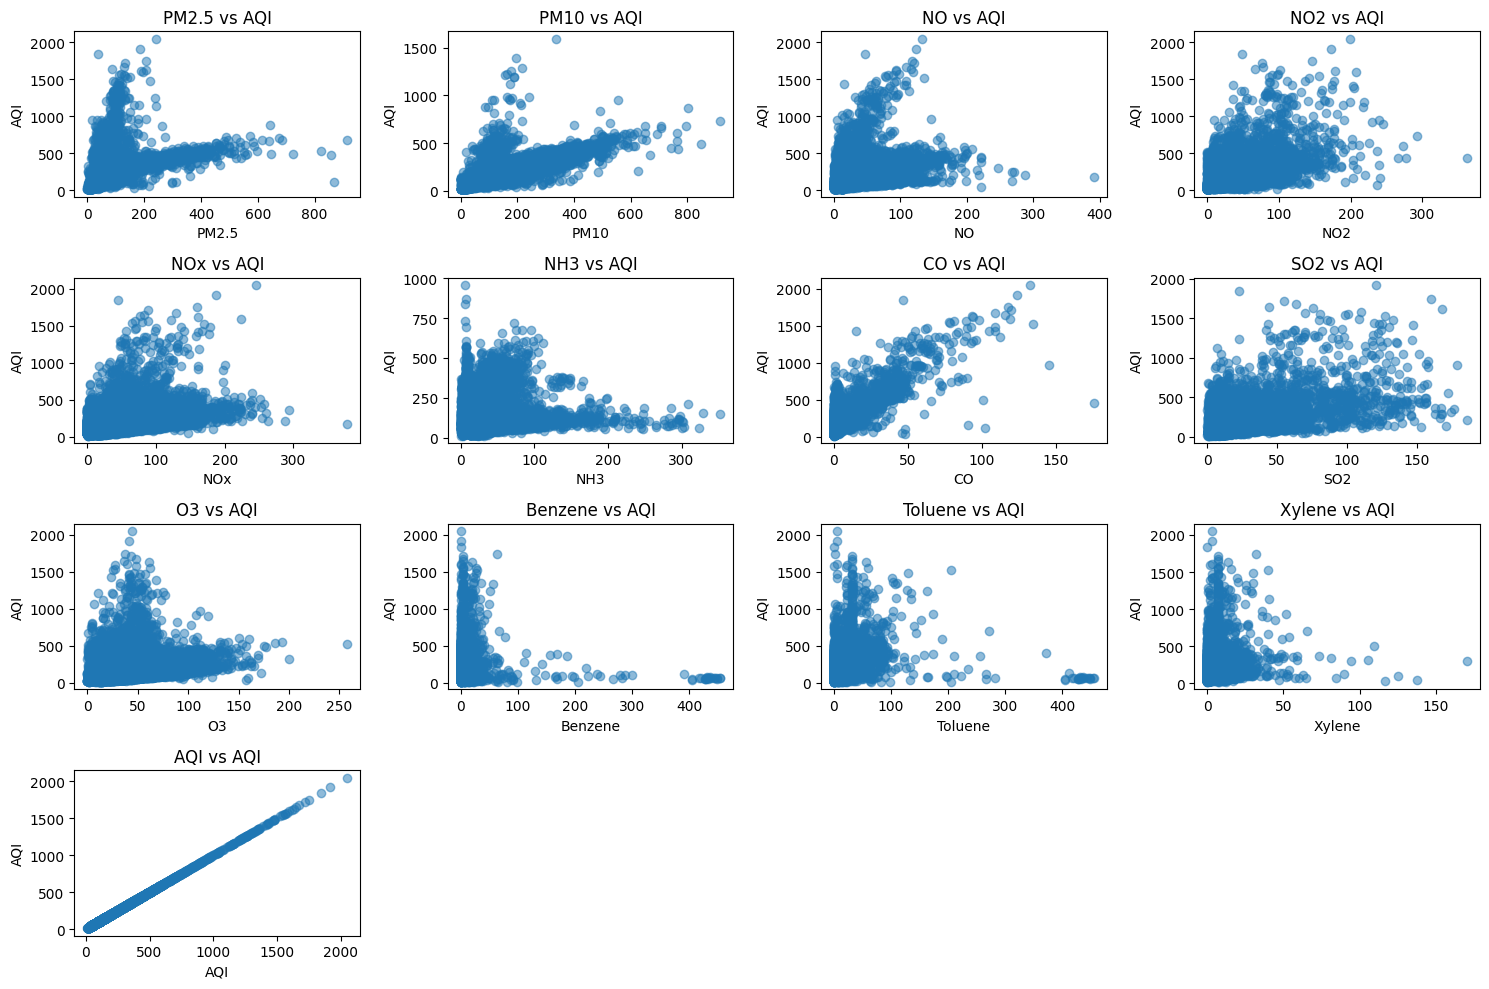

In [152]:
#Create a scatter plot to visualize Outliers
plt.figure(figsize=(15, 10))
for i in range(len(numeric_columns)):
    plt.subplot(4, 4, i+1)
    plt.scatter(df_2[numeric_columns[i]], df_2['AQI'], alpha=0.5)
    plt.title(f'{numeric_columns[i]} vs AQI')
    plt.xlabel(numeric_columns[i])
    plt.ylabel('AQI')

#Adjust the layout to add more space between the boxplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.tight_layout()
plt.show()

In [153]:
#Inter Quantile Range Calculation (IQR)
#Calculate the first and third quartiles (Q1 and Q3) of the numeric columns
Q1 = df_2[numeric_columns].quantile(0.25)
Q3 = df_2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

#Calculate the Lower and Upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
clipped_df = df_2[numeric_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

#Verify changes in Data Distribution
print('clipped_data:')
print()
print()
clipped_df.describe()


clipped_data:




,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,61.148955,112.877919,14.507996,27.259387,29.539227,21.361087,1.079514,11.743115,33.956430,1.986175,6.231113,2.242704,157.342455
std,42.803676,73.706540,12.246567,19.691661,22.721584,16.688309,0.815915,8.220634,19.875592,2.311180,7.332004,2.713072,103.870019
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,158.245000,289.980000,41.430000,76.425000,81.088750,62.180000,2.860000,29.545000,85.635000,7.520000,21.975000,8.165000,398.500000


###Handling Null/Missing values

In [154]:

#Null values represented in percentage
null_values = clipped_df.isnull().sum()
null_values_percentage = (clipped_df.isnull().sum()/clipped_df.isnull().count()*100).sort_values(ascending=False)

#a better representation of null values as precentages
null_values_percentage_rep = pd.concat([null_values, null_values_percentage], axis=1, keys=['Total','Percentage %'])
null_values_percentage_rep

,Total,Percentage %
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692
O3,4022,13.619586
Benzene,5623,19.041008


KNNImputer is a technique employed in data preprocessing to address missing values within a dataset. It leverages the k-Nearest Neighbors (KNN) algorithm, offering a more sophisticated approach compared to simple imputation methods such as mean or median imputation. KNNImputer estimates missing values by identifying the 'k' nearest neighbors of the data point with the missing value and imputing the missing value based on the average or weighted average of the values of these neighboring data points. This approach leverages the inherent structure and relationships within the data to generate more accurate and informative imputations.

In [155]:
#Create an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)
clipped_df_imputed = pd.DataFrame(imputer.fit_transform(clipped_df), columns=numeric_columns)

print('Null values in imputed data:')
print()
print(clipped_df_imputed.isnull().sum())

#Update original data frame with imputed data
df_2[numeric_columns] = clipped_df_imputed

Null values in imputed data:

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64


The choice of n_neighbors can significantly affect the imputation results. Generally, a larger number of neighbors can provide a more stable estimate, but it may also smooth out the data too much, while a smaller number may be more sensitive to local variations.


###Categorical Vaues

In [156]:
#Impute missing categorical values using mode
df_2['AQI_Bucket'] = df_2['AQI_Bucket'].fillna(df_2['AQI_Bucket'].mode()[0])

Mode imputation is a common technique for handling missing values within categorical variables. This method involves replacing missing values with the most frequent category observed in the respective variable. In the context of the pandas library, mode imputation can be implemented using the fillna() function, where the mode() of the column is utilized to fill the missing values. While straightforward and preserving the original distribution of categories, mode imputation may not be suitable in scenarios where the data does not exhibit Missing Completely at Random (MCAR) behavior, as it can introduce bias into the dataset.


source: https://www.linkedin.com/advice/1/heres-how-you-can-address-missing-values-categorical-ktpge

###Validation Checks

At this stage, an assessment of missing values is conducted to evaluate the effectiveness of the imputation method

In [157]:
#review to confirm the changes
print(df_2.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


###Post imputation validation

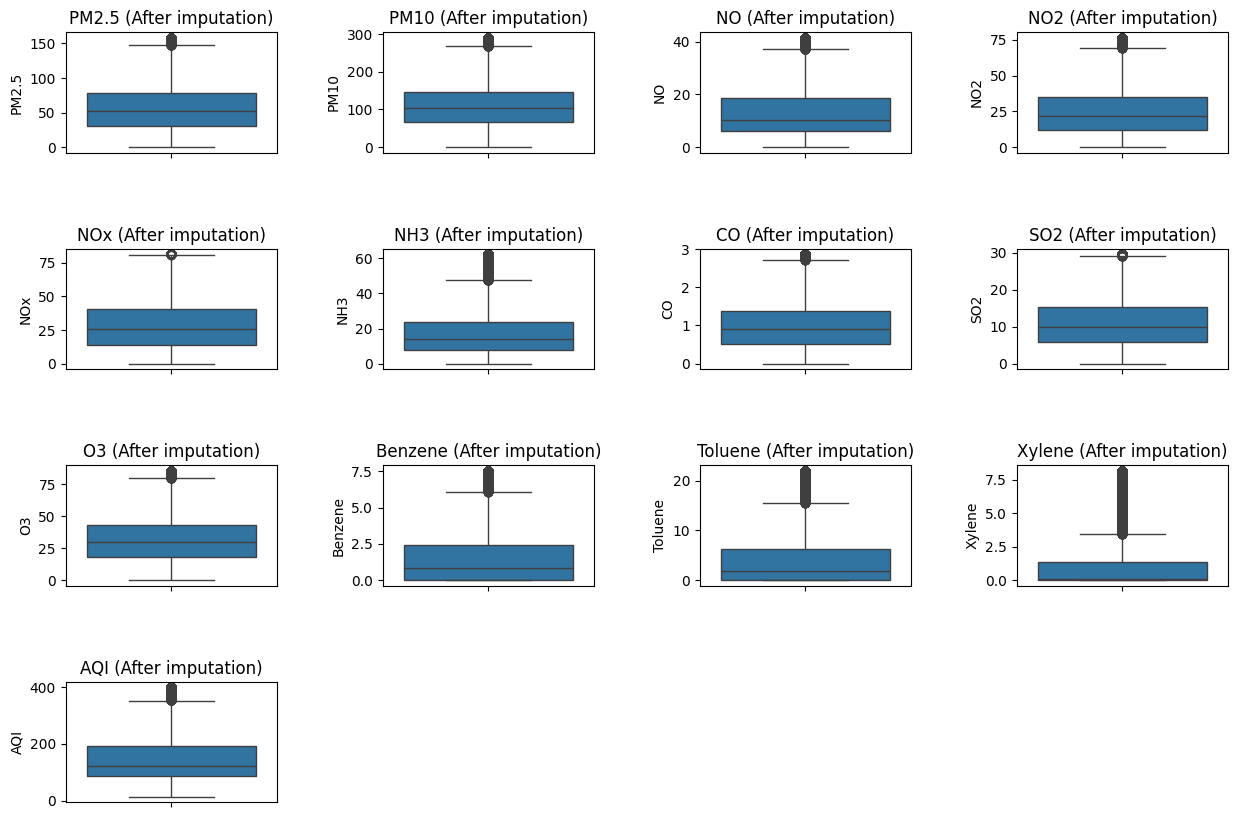

In [158]:
#Create a box plot after handling missing values and outliers
plt.figure(figsize=(15, 10))
for i in range(len(numeric_columns)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=numeric_columns[i], data = df_2)
    plt.title(f'{numeric_columns[i]} (After imputation)')

#Adjust the layout to add more space between the boxplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.tight_layout
plt.show()

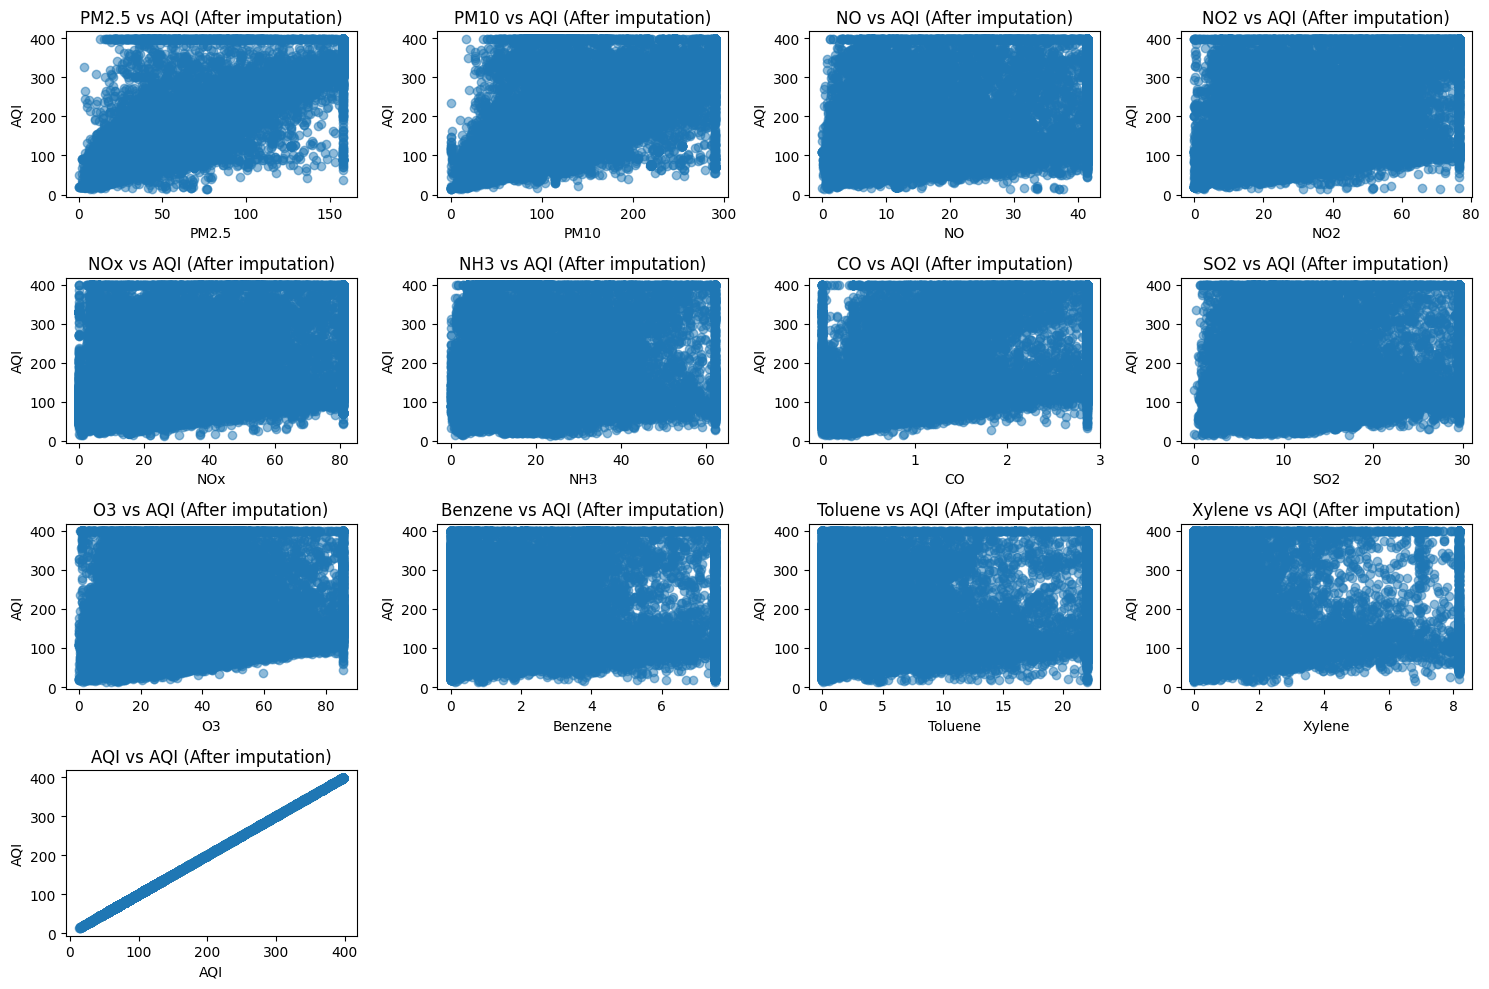

In [159]:
#Create a scatter plot for each feature against AQI after missing values and outliers
plt.figure(figsize=(15, 10))
for i in range(len(numeric_columns)):
    plt.subplot(4, 4, i+1)
    plt.scatter(df_2[numeric_columns[i]], df_2['AQI'], alpha=0.5)
    plt.title(f'{numeric_columns[i]} vs AQI (After imputation)')
    plt.xlabel(numeric_columns[i])
    plt.ylabel('AQI')

#Adjust the layout to add more space between the boxplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.tight_layout()
plt.show()


##Feature Engineering

Feature engineering is a crucial step in the data preprocessing phase of machine learning and data analysis. It involves creating new features or modifying existing ones to improve the performance of predictive models. Effective feature engineering can help capture underlying patterns and relationships that influence air quality indices, such as the Air Quality Index (AQI)

###Time-Based Features

In [160]:
#Convert the date column to datetime format
df_2['Date'] = pd.to_datetime(df_2['Date'], format = '%Y-%m-%d')


#Extract features
df_2['Day_of_week'] = df_2['Date'].dt.dayofweek  #Monday=0, Sunday=6
df_2['Day_of_month'] = df_2['Date'].dt.day
df_2['Month'] = df_2['Date'].dt.month
df_2['Year'] = df_2['Date'].dt.year
df_2['Week_of_year'] = df_2['Date'].dt.isocalendar().week


 The day of the week, day of the month, month, year, and week of the year are extracted. These features can help the model learn weekly, monthly, and annual trends in air quality.  For example, pollution levels might be higher on weekdays due to increased traffic.  The .isocalendar().week method is the correct way to extract the week of the year, avoiding potential issues with different week numbering conventions.

In [161]:
#Verify if new features are created
print('#Monday=0, Sunday=6')
print()
print('Time based features:')
print()
print(df_2[['Day_of_week','Day_of_month','Month','Year','Week_of_year']].head())

#Monday=0, Sunday=6

Time based features:

   Day_of_week  Day_of_month  Month  Year  Week_of_year
0            3             1      1  2015             1
1            4             2      1  2015             1
2            5             3      1  2015             1
3            6             4      1  2015             1
4            0             5      1  2015             2


Visualize Time-based Series

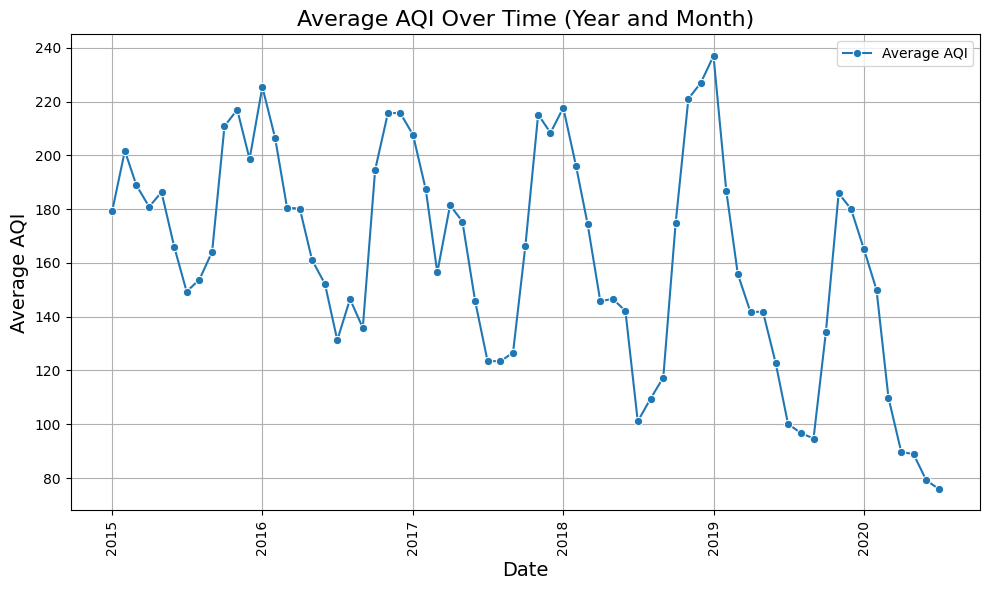

In [162]:
#Ensure numeric columns are selected for aggregation
numeric_columns = df_2.select_dtypes(include=[np.number]).columns

#Group by Year and Month to calculate average AQI
average_AQI = df_2.groupby(['Year', 'Month'])['AQI'].mean().reset_index()

#Create a new Date column for plotting
average_AQI['Date'] = pd.to_datetime(average_AQI[['Year', 'Month']].assign(DAY=1))

#Plot the average AQI over time
plt.figure(figsize=(10, 6))  #Set the figure size
sns.lineplot(data=average_AQI, x='Date', y='AQI', marker='o', label='Average AQI')  #Plot average AQI

# Adding titles and labels
plt.title('Average AQI Over Time (Year and Month)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.legend()
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

The most prominent characteristic observed is the marked seasonality of PM2.5 concentrations. A consistent pattern of elevated concentrations during specific periods of the year, alternating with periods of lower concentrations, is evident. This cyclical pattern, approximating a 12-month period, strongly indicates the influence of seasonally varying factors. These factors may include meteorological conditions, anthropogenic activities such as agricultural burning and domestic heating, or a complex interplay of both.

###NO2:PM2.5 Ratio

A ratio of NO2 to PM2.5 is also created. This ratio is important as it can indicate different pollution sources.

In [163]:
#Create a new feature: NO2/PM2.5 ratio
df_2['NO2_to_PM2.5'] = df_2['NO2'] / df_2['PM2.5']

#Drop any infinite values that might have resulted from division by zero
df_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_2.dropna(subset=['NO2_to_PM2.5'], inplace=True)


In [164]:
# Verify if new features are created
print('Pollutant Concentration Features:')
print()
print( df_2[['NO2', 'PM2.5', 'NO2_to_PM2.5']].head())

Pollutant Concentration Features:

     NO2   PM2.5  NO2_to_PM2.5
0  18.22  23.178      0.786090
1  15.69  24.736      0.634298
2  19.30  79.180      0.243748
3  18.48  40.686      0.454210
4  21.42  82.751      0.258849


Visualize Time-based Series

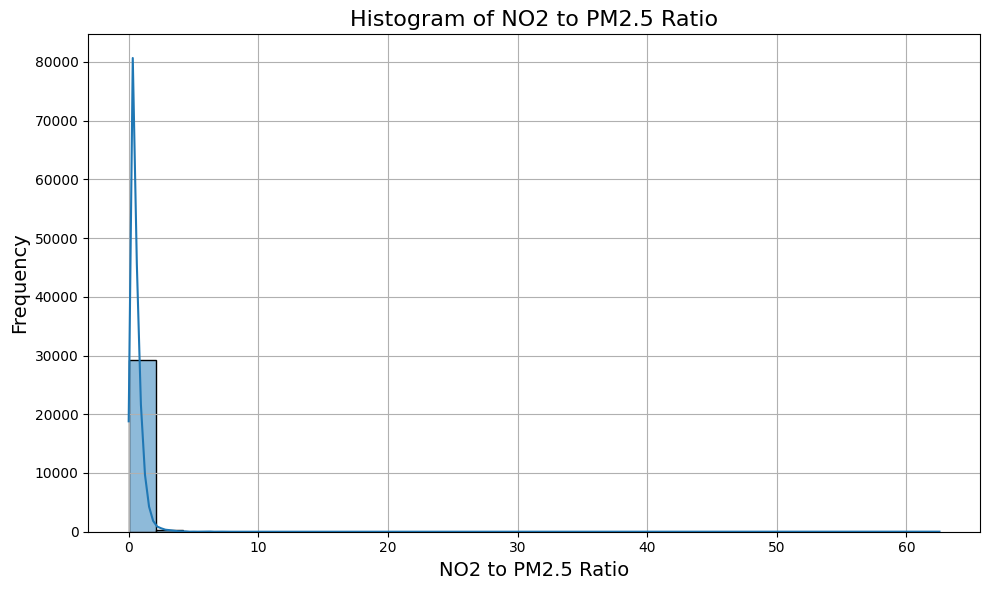

In [165]:
#Plot the histogram of the NO2/PM2.5 ratio
plt.figure(figsize=(10, 6))  #Set the figure size
sns.histplot(df_2['NO2_to_PM2.5'], bins=30, kde=True)  #Create histogram with kernel density estimate

#Add title and labels
plt.title('Histogram of NO2 to PM2.5 Ratio', fontsize=16)
plt.xlabel('NO2 to PM2.5 Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

#Show the plot
plt.grid()  #Add grid for better readability
plt.tight_layout()  #Adjust layout to prevent clipping of labels
plt.show()

The skewed distribution of the NO₂ to PM2.5 ratio indicates that PM2.5 is the predominant pollutant within the environment represented by this dataset. However, the presence of a long tail suggests that NO₂ concentrations can reach significantly elevated levels under specific conditions, underscoring the necessity of considering its impact in air quality assessments.

In [166]:
#Visualize all added features
df_2.head()
#df_2.describe()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,Day_of_week,Day_of_month,Month,Year,Week_of_year,NO2_to_PM2.5
0,Ahmedabad,2015-01-01,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.640,...,0.02,0.00,122.4,Moderate,3,1,1,2015,1,0.786090
1,Ahmedabad,2015-01-02,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.550,...,5.50,3.77,124.2,Moderate,4,2,1,2015,1,0.634298
2,Ahmedabad,2015-01-03,79.180,133.882,17.40,19.30,29.70,15.748,2.86,29.070,...,16.40,2.25,268.1,Moderate,5,3,1,2015,1,0.243748
3,Ahmedabad,2015-01-04,40.686,153.230,1.70,18.48,17.97,11.792,1.70,18.590,...,10.14,1.00,153.0,Moderate,6,4,1,2015,1,0.454210
4,Ahmedabad,2015-01-05,82.751,137.980,22.10,21.42,37.76,7.450,2.86,29.545,...,18.89,2.78,340.8,Moderate,0,5,1,2015,2,0.258849


##Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.

In [167]:
#Initialize Min-Max Scaler
scaler = MinMaxScaler()

#Apply Min-Max scaling to the specified numeric columns
scaled_data = pd.DataFrame(scaler.fit_transform(df_2[numeric_columns]), columns=numeric_columns)

#Update original dataframe with the scaled values
df_2[numeric_columns] = scaled_data

#Print scaled data
print("Data after Min-Max scaling:\n")
print(df_2.head())


Data after Min-Max scaling:

        City       Date     PM2.5      PM10        NO       NO2       NOx  \
0  Ahmedabad 2015-01-01  0.146253  0.434879  0.021734  0.238304  0.211497   
1  Ahmedabad 2015-01-02  0.156101  0.425934  0.022941  0.205195  0.202987   
2  Ahmedabad 2015-01-03  0.500237  0.461675  0.419705  0.252437  0.366265   
3  Ahmedabad 2015-01-04  0.256920  0.528399  0.040570  0.241706  0.221609   
4  Ahmedabad 2015-01-05  0.522809  0.475808  0.533205  0.280181  0.465663   

        NH3        CO       SO2  ...   Toluene    Xylene       AQI  \
0  0.165417  0.321678  0.935500  ...  0.000910  0.000000  0.283787   
1  0.166576  0.339161  0.830879  ...  0.250284  0.461727  0.288457   
2  0.253145  1.000000  0.983917  ...  0.746303  0.275566  0.661738   
3  0.189513  0.594406  0.629084  ...  0.461433  0.122474  0.363165   
4  0.119672  1.000000  1.000000  ...  0.859613  0.340478  0.850324   

   AQI_Bucket  Day_of_week Day_of_month  Month  Year  Week_of_year  \
0    Moderate    

##Categorical Data

One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data.

source:https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding

In [168]:
#One-Hot Encoding for the AQI_Bucket
df_2_encoded = pd.get_dummies(df_2, columns=['AQI_Bucket'], drop_first=True)

#Verify encoded data
print("Data after One-Hot Encoding:")
print(df_2_encoded.head())

Data after One-Hot Encoding:
        City       Date     PM2.5      PM10        NO       NO2       NOx  \
0  Ahmedabad 2015-01-01  0.146253  0.434879  0.021734  0.238304  0.211497   
1  Ahmedabad 2015-01-02  0.156101  0.425934  0.022941  0.205195  0.202987   
2  Ahmedabad 2015-01-03  0.500237  0.461675  0.419705  0.252437  0.366265   
3  Ahmedabad 2015-01-04  0.256920  0.528399  0.040570  0.241706  0.221609   
4  Ahmedabad 2015-01-05  0.522809  0.475808  0.533205  0.280181  0.465663   

        NH3        CO       SO2  ...  Day_of_month  Month  Year  Week_of_year  \
0  0.165417  0.321678  0.935500  ...      0.000000    0.0   0.0      0.000000   
1  0.166576  0.339161  0.830879  ...      0.033333    0.0   0.0      0.000000   
2  0.253145  1.000000  0.983917  ...      0.066667    0.0   0.0      0.000000   
3  0.189513  0.594406  0.629084  ...      0.100000    0.0   0.0      0.000000   
4  0.119672  1.000000  1.000000  ...      0.133333    0.0   0.0      0.019231   

   NO2_to_PM2.5  AQI_

##Feature Selection

Feature importance is essential in understanding which variables significantly impact AQI predictions. By focusing on the most important features, you can enhance model performance and interpretability, leading to better insights into air quality factors.

source: https://www.geeksforgeeks.org/predicting-air-quality-index-using-python/


Training Data Shape: (23624, 23)
Test Data Shape: (5907, 23)

Top features based on importance:
                    Feature  Importance
0                     PM2.5    0.578066
21        AQI_Bucket_Severe    0.123469
18      AQI_Bucket_Moderate    0.081279
19          AQI_Bucket_Poor    0.074079
22     AQI_Bucket_Very Poor    0.031089
6                        CO    0.027547
4                       NOx    0.016268
7                       SO2    0.014327
1                      PM10    0.012389
20  AQI_Bucket_Satisfactory    0.007787



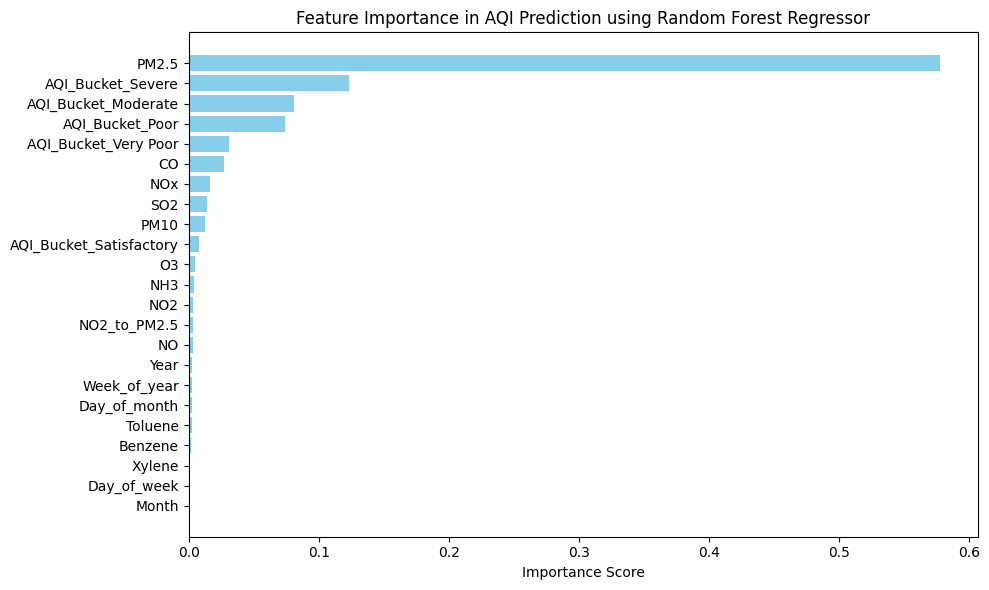

In [169]:
#Define features and target variable
X = df_2_encoded.drop(['AQI', 'City', 'Date'], axis=1)  #Dropping non-numeric or irrelevant columns)
y = df_2_encoded['AQI']  #Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check shape of the training and testing data
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print()

#Create and fit the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Get feature importance
importance = model.feature_importances_

#Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)#sort by importance

#Display top features
print("Top features based on importance:")
print(feature_importance_df.head(10))
print()

#Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance in AQI Prediction using Random Forest Regressor')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The feature importance plot provides valuable insights, it suggests that the model is primarily relying on PM2.5 and AQI_Bucket categories for predictions.
By focusing on the most important features, you can enhance model performance and interpretability, leading to better insights into air quality factors.

###Retrain the model

A new Random Forest model is trained using only the selected features.

Feature Importance:
                    Feature  Importance
0                     PM2.5    0.578066
21        AQI_Bucket_Severe    0.123469
18      AQI_Bucket_Moderate    0.081279
19          AQI_Bucket_Poor    0.074079
22     AQI_Bucket_Very Poor    0.031089
6                        CO    0.027547
4                       NOx    0.016268
7                       SO2    0.014327
1                      PM10    0.012389
20  AQI_Bucket_Satisfactory    0.007787
8                        O3    0.005114
5                       NH3    0.004405
3                       NO2    0.003252
17             NO2_to_PM2.5    0.003147
2                        NO    0.003044
15                     Year    0.002434
16             Week_of_year    0.002293
13             Day_of_month    0.002263
10                  Toluene    0.002239
9                   Benzene    0.001905
11                   Xylene    0.001425
12              Day_of_week    0.001386
14                    Month    0.000793

Selected Important 

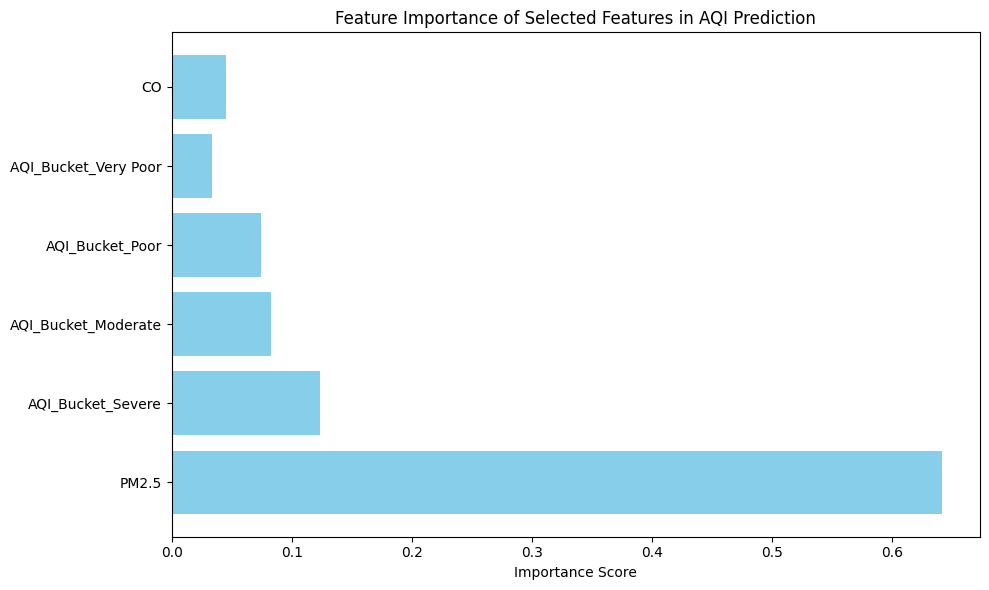


Model Evaluation Metrics:

Mean Absolute Error: 0.04
Mean Squared Error: 0.01
R-squared: 0.92


In [170]:
# Display feature importance
print("Feature Importance:")
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_df)

#Selected Important Features
top_6_features = ['PM2.5', 'CO', 'NOx', 'SO2', 'PM10', 'NO2']
print("\nSelected Important Features:")
print(top_6_features)
print()

#Select the top 6 features
top_6_features = feature_importance_df.nlargest(6, 'Importance')['Feature'].values
print("Top 6 Selected Features:")
print(top_6_features)

#Create new feature set with only the selected features
X_train_selected = X_train[top_6_features]
X_test_selected = X_test[top_6_features]

#Retrain the model:
#Predictions are made on the test set using the retrained model
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train)

#Make predictions
y_pred = model_selected.predict(X_test_selected)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Plot feature importance of the selected model
importance_selected = model_selected.feature_importances_
feature_importance_selected_df = pd.DataFrame({'Feature': top_6_features, 'Importance': importance_selected})

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_selected_df['Feature'], feature_importance_selected_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance of Selected Features in AQI Prediction')
plt.tight_layout()
plt.show()

#Print evaluation metrics
print("\nModel Evaluation Metrics:")
print()
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


The features are sorted based on their importance scores in the initial model. This is a common practice to identify the most influential features for prediction.(Breiman, L. 2001)

Based on the analysis, the top 6 features (top_6_features) are selected. The feature importance analysis helps identify a reduced set of features that can potentially capture the essential information for AQI prediction, potentially leading to a more efficient model while maintaining good performance.(Guyon, I., & Elisseeff, A. 2003)


A new Random Forest Regressor model (model_selected) is retrained using only the selected top 6 features (X_train_selected and X_test_selected). This is a common approach to reduce model complexity and potentially improvegeneralizability by avoiding overfitting to the training data. (James, G.et al.2013)

The model's performance is then evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2). These metrics provide insights into the model's ability to predict AQI values accurately.
Retraining the model with a reduced feature set allows for assessment of the trade-off between model complexity and performance. Analyzing the evaluation metrics (MAE, MSE, R2) will reveal whether using only the top 6 features yields comparable or potentially better performance compared to the original model using all features.

##Model Selection

###Linear Regression  


In [171]:

#Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Predicting using the Linear Regression Model
y_pred_lin_reg =lin_reg.predict(X_test)

#Evaluation
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(f"Linear Regression - MSE: {mse_lin_reg}, R2: {r2_lin_reg}")

Linear Regression - MSE: 0.006537079699269585, R2: 0.8995437441261165


###Random Forest Regressor

In [172]:
# Random Forest Regressor
rand_frst = RandomForestRegressor(n_estimators=100, random_state=42)
rand_frst.fit(X_train, y_train)

# Predicting using the Random Forest Regressor
y_pred_rf = rand_frst.predict(X_test)

# Evaluation
mse_rand_frst = mean_squared_error(y_test, y_pred_rf)
r2_rand_frst = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {mse_rand_frst}, R2: {r2_rand_frst}")

Random Forest Regressor - MSE: 0.003449703930877437, R2: 0.9469878972397894


###k-Nearest Neighbors (k-NN)

In [173]:
# k-NN Model
k_nn = KNeighborsRegressor(n_neighbors=5)
k_nn.fit(X_train, y_train)

# Predicting using the k-NN Model
y_pred_k_nn = k_nn.predict(X_test)

# Evaluation
mse_k_nn = mean_squared_error(y_test, y_pred_k_nn)
r2_k_nn = r2_score(y_test, y_pred_k_nn)
print(f"k-NN Regressor - MSE: {mse_k_nn}, R2: {r2_k_nn}")

k-NN Regressor - MSE: 0.004250573273981493, R2: 0.9346808213965196


##Model Training

In [174]:
#Split into 80% Training data and 20% Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data size: {X_train.shape}, Test data size: {X_test.shape}")


Training data size: (23624, 23), Test data size: (5907, 23)


In [176]:
#Hyperparameter Tuning: Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

KeyboardInterrupt: 

In [ ]:
#Hyperparameter Tuning: k-NN
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

y_pred_k_nn = best_knn.predict(X_test)
mse_k_nn = mean_squared_error(y_test, y_pred_k_nn)
r2_k_nn = r2_score(y_test, y_pred_k_nn)


In [ ]:
#Cross-Validation
cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
cv_scores_knn = cross_val_score(best_knn, X, y, cv=5, scoring='r2')
cv_scores_lr = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')

In [ ]:
#Print Results
print("Model Performance Metrics:")
print(f"Linear Regression - MSE: {mse_lin_reg:.6f}, R²: {r2_lin_reg:.6f}, CV Mean R²: {cv_scores_lr.mean():.6f}")
print(f"Random Forest - MSE: {mse_rand_frst:.6f}, R²: {r2_rand_frst:.6f}, CV Mean R²: {cv_scores_rf.mean():.6f}")
print(f"k-NN - MSE: {mse_k_nn:.6f}, R²: {r2_k_nn:.6f}, CV Mean R²: {cv_scores_knn.mean():.6f}")

print("Best Hyperparameters:")
print("Random Forest:", rf_grid.best_params_)
print("k-NN:", knn_grid.best_params_)